# Telecomm Customer Churn Analysis

In [58]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import metrics
from sklearn.preprocessing import scale,LabelEncoder

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
#Reading dataset
Tcus=pd.read_csv('Telco-Customer-Churn.csv')
Tcus.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
#converting columns having numeric values to numeric datatype
Tcus = Tcus.convert_objects(convert_numeric=True)
Tcus.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [109]:
Tcus['tenure'].describe()
#maximum tenure in 72months, minimum 0 months

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [110]:
Tcus.tenure.median()

29.0

In [111]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF6F4A8>]], dtype=object)

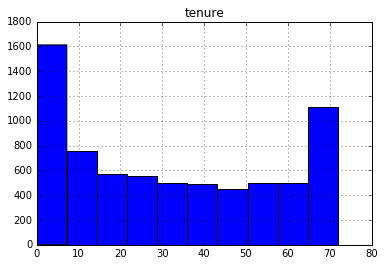

In [112]:
Tcus.hist('tenure')
#most of the customers having contract tenure between 9 to 65 months

In [113]:
Tcus['tenure'].median()

29.0

{'boxes': [<matplotlib.lines.Line2D at 0xdc386d8>],
 'caps': [<matplotlib.lines.Line2D at 0xdc49358>,
 'fliers': [<matplotlib.lines.Line2D at 0xdc56400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xdc49e48>],
 'whiskers': [<matplotlib.lines.Line2D at 0xdc38898>,
  <matplotlib.lines.Line2D at 0xdc38da0>]}

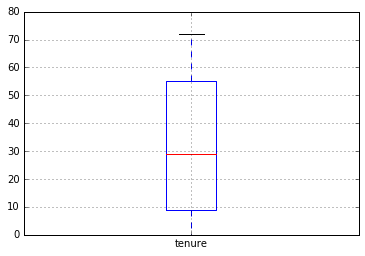

In [114]:
Tcus.boxplot('tenure')
#tenure between 55-72 and 0-9 months are outliers 

In [115]:
Tcus.Contract.value_counts(normalize='True')
# 55% customers contract type is mon to month , 24% customers two year contract , 20% customers  one year contract

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [116]:
Tcus.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [117]:
Tcus.TotalCharges.std()/Tcus.TotalCharges.mean()

0.9927608830344595

In [118]:
Tcus.TotalCharges.median()

1397.475

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D27BBA8>]], dtype=object)

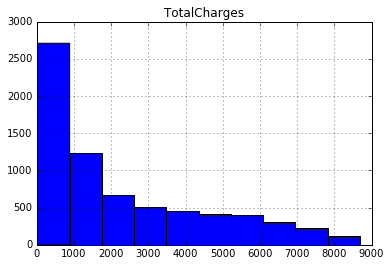

In [119]:
Tcus.hist('TotalCharges')

In [120]:
#filling nll values with median 
Tcus.TotalCharges.fillna(value=Tcus.TotalCharges.median(),inplace='True')

In [121]:
Tcus.TotalCharges.isnull().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DEEDF60>]], dtype=object)

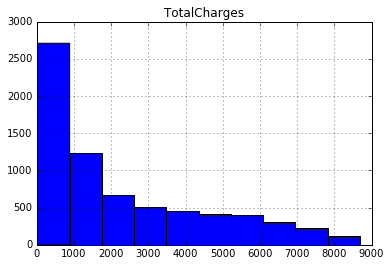

In [122]:
Tcus.hist('TotalCharges')

In [123]:
#13%females,13% male are moving out
pd.crosstab(Tcus.gender,Tcus.Churn)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [124]:
pd.crosstab(Tcus.InternetService,Tcus.Churn)
#customers having internet services are moving out

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [125]:
pd.crosstab(Tcus.Contract,Tcus.Churn)
# customers with contact type month -to -month are moving out

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


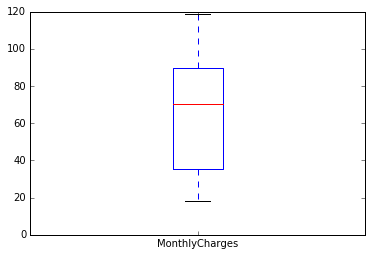

In [126]:
%matplotlib inline
Tcus.plot(x='Churn',y='MonthlyCharges',kind='box')

In [127]:
Tcus[['tenure','MonthlyCharges']].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [128]:
Tcus[['tenure','MonthlyCharges']].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [129]:
pd.crosstab([Tcus.gender,Tcus.SeniorCitizen],Tcus.Churn)
#Young age customers are moving ou

Churn                   No  Yes
gender SeniorCitizen           
Female 0              2221  699
       1               328  240
Male   0              2287  694
       1               338  236

In [130]:
#customers who do not have device protection are moving out
pd.crosstab([Tcus.SeniorCitizen,Tcus.Contract],Tcus.Churn)

Churn                           No   Yes
SeniorCitizen Contract                  
0             Month-to-month  1854  1214
              One year        1146   137
              Two year        1508    42
1             Month-to-month   366   441
              One year         161    29
              Two year         139     6

In [131]:
Tcus.groupby(['Contract','Churn']).tenure.mean()
#irrespictive of contract type higher the tenure the more churning 

Contract        Churn
Month-to-month  No       21.033333
                Yes      14.016918
One year        No       41.674063
                Yes      44.963855
Two year        No       56.602914
                Yes      61.270833
Name: tenure, dtype: float64

In [132]:
Tcus.groupby(['Contract','PaymentMethod','Churn']).tenure.mean()
#customers whose payment method is automatic bank transfer, credit card are moving 

Contract        PaymentMethod              Churn
Month-to-month  Bank transfer (automatic)  No       27.855670
                                           Yes      19.208955
                Credit card (automatic)    No       25.808219
                                           Yes      20.157303
                Electronic check           No       22.414720
                                           Yes      14.144869
                Mailed check               No       11.913257
                                           Yes       5.989362
One year        Bank transfer (automatic)  No       46.104816
                                           Yes      45.210526
                Credit card (automatic)    No       45.109244
                                           Yes      48.682927
                Electronic check           No       45.674912
                                           Yes      48.406250
                Mailed check               No       29.181529
                     

In [133]:
Tcus['is_churn']=Tcus['Churn'].map({'No':0,'Yes':1})

In [134]:
Tcus.shape

(7043, 22)

In [135]:
#converting columns having numeric values to numeric datatype
Tcus = Tcus.convert_objects(convert_numeric=True)
Tcus.dtypes
#filling nll values with median 
Tcus.TotalCharges.fillna(value=Tcus.TotalCharges.median(),inplace='True')

In [136]:
X=Tcus[['tenure','Contract','InternetService','TotalCharges']]
le = LabelEncoder()
for i in X.columns:
    if X[i].dtype=='object':
        le.fit(X[i])
        X[i]=le.transform(X[i])
X=scale(X)
#for i in X.columns:
#    if X[i].dtype == 'object':
#        le.fit(X[i])
#        X[i] = le.transform(x[i])
#X = scale(X)
y=Tcus['is_churn']


In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [138]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_test=lr.predict(X_test)
Explained_Cov=lr.score(X_test,y_test)
print("exaplined covarinace is {}".format(Explained_Cov))

exaplined covarinace is 0.794889992903


In [139]:
print("coefficients for Logistic regression {}".format(lr.coef_))

coefficients for Logistic regression [[-2.22190985 -1.00976598 -0.10088311  1.81526841]]


In [140]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score,jaccard_similarity_score
mse=mean_squared_error(y_test,Y_test,multioutput='uniform_average')
print("mse is {}".format(mse))
mae=mean_absolute_error(y_test,Y_test,multioutput='uniform_average')
print('mae is {}'.format(mae))
evs=explained_variance_score(y_test,Y_test,multioutput='uniform_average')
print("evs is {}".format(evs))
rsc=r2_score(y_test,Y_test)
print("r2 score is {}".format(rsc))
print("jaccard similarity is {}".format(jaccard_similarity_score(y_test,Y_test)))

mse is 0.205110007097
mae is 0.205110007097
evs is -0.0850748047277
r2 score is -0.102844312999
jaccard similarity is 0.794889992903


In [141]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve,auc
#confusion matrix
print(metrics.confusion_matrix(y_test,Y_test))

[[957 104]
 [185 163]]


In [142]:
print(metrics.classification_report(y_test,Y_test))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1061
          1       0.61      0.47      0.53       348

avg / total       0.78      0.79      0.79      1409



In [143]:
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,Y_test)
roc_area=auc(false_positive_rate,true_positive_rate)
print("area under the curve is {}". format(roc_area))

area under the curve is 0.685185034721


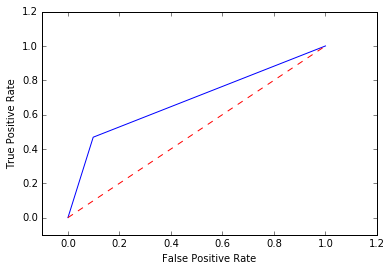

In [144]:
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC ' % roc_area)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [145]:
CVscore=cross_val_score(LogisticRegression(),X,y,cv=10)
print(CVscore)
print(CVscore.mean())


[ 0.78723404  0.78723404  0.76170213  0.76595745  0.78125     0.76278409
  0.80113636  0.76846591  0.76988636  0.80512091]
0.779077129723
